# Loan Prediction Analysis
* Loan privileges can also be said to be credit worthiness, which is how a lender evaluates
whether or not you will default on your debt obligations, as well as whether or not you are
eligible for a credit or additional credit. The amount of money you can borrow is determined by a
number of factors, including your repayment history and credit score. When determining the
possibility of default, some lending organizations take into action your available asset as well as
the quantity of liabilities you have.
* In finance, Loan is lending help for a induvidual (or) organisation by the other induvidual (or) organization. But it has it's own merits and demerits. One such is the trust that money lender should have on the load borrower. This trust needs to meet some requirements like collateral and their monthly earnings. This notebook is just a simple example for such validation using Machine learning
### Statement of the Problem 
* Decisions on traditional bank loans are made using credit scores along with data from
application forms and credit reference agencies, which can be cumbersome, error prone and
often biased process. Another problem is the guarantor’s problem, where guarantors are not
aware of their status of standing in for a loan application.
Due to inadequate credit checks, weak intermediation, a lack of transparency, and the
inherent financial situation of typical internet browsers, online lending has higher risks than
traditional bank consumer loans. Therefore, credit risks prediction and management become
vitally important.
### AIM
* The aim of this research work is to propose a machine learning model that will help
check for irregularities during the application of online loans, irregularities such as the
unawareness of the guarantor as regards the loan until it is time for repayment. Also, its aim is to
use machine learning to determine who is and who is not able to secure loans from this app and
how the conditions or criteria needed to qualify for a loan are easily determined by machine
learning.
### Data Description 
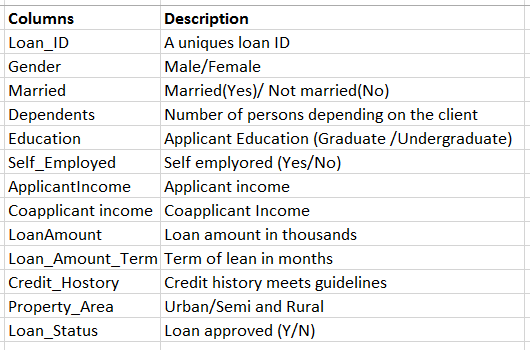

### Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
import mlflow



### Loading Dataset

In [4]:
test_df = pd.read_csv('test.csv') # Test data
train_df = pd.read_csv('train.csv') # Train data

# Creating copy
train_copy = train_df.copy()
test_copy = test_df.copy()

train_copy.head() # View dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

### Exploring Data

In [ ]:
#Viewing Data Description

train_df.describe()

In [ ]:
train_df.isna().sum()

##### Report on missing data
* Base on the above visualization there are quite a lot of missing entry at various columns 
* Gender column has 13 missing value | Could be fix with Mode value
* Married column has 3 missing value | Could also be fix with mode value
* Dependent has about 15 missing values | Since there are chances that people without dependent might not have any we could fix this with 0
* Self Employed has 32 missing values | We can fix this with fill na forward option
* LoanAmount has 22 missing values | We can fix this with mean value
* Loan Amount Term has 14 missing values | We can fix this with mode value of the column
* credit history has 50 missing value | We can't possible drop the credit history due to its large correlation to our dependent variable
* Convert 3+ values in Dependent column to 3

In [6]:
# Fixing missing values
# Gender
train_copy.Gender = train_copy.Gender.fillna(train_copy.Gender.mode()[0])
test_copy.Gender = test_copy.Gender.fillna(test_copy.Gender.mode()[0])

# Married
train_copy.Married = train_copy.Married.fillna(train_copy.Married.mode()[0])
test_copy.Married= test_copy.Married.fillna(test_copy.Married.mode()[0])

# Dependents
train_copy.Dependents = train_copy.Dependents.fillna('0')
test_copy.Dependents = test_copy.Dependents.fillna('0')
train_copy.Dependents = train_copy.Dependents.replace('3+','3')
test_copy.Dependents = test_copy.Dependents.replace('3+','3')
pd.to_numeric(train_copy['Dependents'])
# Self_Employed
train_copy.Self_Employed = train_copy.Self_Employed.fillna(method='ffill')
test_copy.Self_Employed = test_copy.Self_Employed.fillna(method='ffill')

# Loan Amount
train_copy.LoanAmount = train_copy.LoanAmount.fillna(train_copy.LoanAmount.mean())
test_copy.LoanAmount = test_copy.LoanAmount.fillna(test_copy.LoanAmount.mean())

# Loan Amount Term
train_copy.Loan_Amount_Term = train_copy.Loan_Amount_Term.fillna(train_copy.Loan_Amount_Term.mean())
test_copy.Loan_Amount_Term = test_copy.Loan_Amount_Term.fillna(test_copy.Loan_Amount_Term.mean())

# ffil credit history
train_copy.Credit_History = train_copy.Credit_History.fillna('0')
test_copy.Credit_History = test_copy.Credit_History.fillna('0')
pd.to_numeric(train_copy['Credit_History'])

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [ ]:
# Check For Changes in Missing Values in Dataset

train_copy.isna().sum()

#### Tidy Data
* Some columns are not in correct datatype e.g Loan amount and Dependent


In [7]:
#Checking DataTypes

train_copy.info()

train_copy.Dependents=train_copy.Dependents.astype(int)
test_copy.Dependents=test_copy.Dependents.astype(int)

train_copy.LoanAmount=train_copy.LoanAmount.astype(int)
test_copy.LoanAmount=test_copy.LoanAmount.astype(int)

train_copy.Credit_History=train_copy.Credit_History.astype(int)
test_copy.Credit_History=test_copy.Credit_History.astype(int)

#Check for Changes
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Co

#### Exploratory Analysis

In [ ]:
# The Histogram distribution of the Loan Amount
sns.distplot(train_copy.LoanAmount)
plt.show()

In [ ]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train_copy)
plt.show()

"""There is no much bias on the loans that were approved
   Or regected in respect to the amount of loan requested for"""

   

In [ ]:
sns.countplot(x='Loan_Status', hue='Credit_History', data=train_copy)
plt.show()

""" Majority of the Loans that were approved has a credit history
    While majority of the loans that were regected does not have a credit history
    Althoug some of the loans with a credit history were rejected while 
    some of the loan without a credit history were accepted 
    This plot shows the correlation between our target column and the credit history
    """

In [ ]:
plt.scatter(train_copy['ApplicantIncome'], train_copy['LoanAmount'])
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

##### Exploratory Report
* The Loan Amount is left skewed which is as a reason of outliers we can fix this by performing Log Transformation on the data
* There is no much bias on the loans that were approved or regected in respect to the amount of loan requested for
* Majority of the Loans that were approved has a credit history while majority of the loans that were regected does not have a credit history although some of the loans with a credit history were rejected while some of the loan without a credit history were accepted. This plot shows the correlation between our target column and the credit history
* Also there are few outliers on the applicant income column

### Encoding Data
* The Property Area and The Loan Status Columns will be encoded using the Label Encoding 
* Other Column will be encoded using one hot encoding techniques withe the dummies function in pandas

In [8]:
# Performing Label Encoding
propertydict = []
label_encoding_categorical_columns = ['Property_Area', 'Loan_Status']
encoder = LabelEncoder()

for column in label_encoding_categorical_columns:
  encoded = encoder.fit_transform(train_copy[column])
  train_copy.drop(column, axis=1, inplace=True)
  train_copy[column] = encoded
  feature_dict = dict(zip(range(len(encoder.classes_)), encoder.classes_))
  propertydict.append(feature_dict)

  if column == 'Loan_Status':
    break

  encoded_test = encoder.fit_transform(test_copy[column])
  test_copy.drop(column, axis=1, inplace=True)
  test_copy[column] = encoded_test




In [9]:
# Performing One Hot Encoding
onehot_encoding_categorical_columns = ['Gender', 'Married', 'Education','Self_Employed']

train_copy = pd.get_dummies(train_copy, columns = onehot_encoding_categorical_columns,drop_first=True)
test_copy = pd.get_dummies(test_copy, columns = onehot_encoding_categorical_columns,drop_first=True)


#### Drop Unnecessary Column
* The Id column is a column that has no null value and all unique column therefor it will has no meaning to our dataset hence its advisable we drop it.

In [10]:
train_copy.drop('Loan_ID',axis=1,inplace=True)
test_copy.drop('Loan_ID',axis=1,inplace=True)

In [11]:
train_copy.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes
0,0,5849,0.0,146,360.0,1,2,1,1,0,0,0
1,1,4583,1508.0,128,360.0,1,0,0,1,1,0,0
2,0,3000,0.0,66,360.0,1,2,1,1,1,0,1
3,0,2583,2358.0,120,360.0,1,2,1,1,1,1,0
4,0,6000,0.0,141,360.0,1,2,1,1,0,0,0


#### Feature engineering

* Create a column for Totalhousehold_income which is a result of applicantincome + coapplicantincome


In [12]:
train_copy['Totalhouseincome'] = train_copy['ApplicantIncome'] + train_copy['CoapplicantIncome']
test_copy['Totalhouseincome'] = test_copy['ApplicantIncome'] + test_copy['CoapplicantIncome']

In [13]:
train_copy.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Totalhouseincome
0,0,5849,0.0,146,360.0,1,2,1,1,0,0,0,5849.0
1,1,4583,1508.0,128,360.0,1,0,0,1,1,0,0,6091.0
2,0,3000,0.0,66,360.0,1,2,1,1,1,0,1,3000.0
3,0,2583,2358.0,120,360.0,1,2,1,1,1,1,0,4941.0
4,0,6000,0.0,141,360.0,1,2,1,1,0,0,0,6000.0


#### Feature Scaling
* We perform feature scaling using standard scaler

In [14]:
mlflow.autolog()


numerical_columns = ['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Totalhouseincome']
numerical_df_train = train_copy[numerical_columns]
numerical_df_test = test_copy[numerical_columns]
scaler = StandardScaler()


2023/05/16 13:43:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2023/05/16 13:44:01 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [15]:
scaled_train = pd.DataFrame(scaler.fit_transform(numerical_df_train),columns=numerical_columns)
scaled_test = pd.DataFrame(scaler.transform(numerical_df_test),columns=numerical_columns)

In [16]:
final_train = pd.concat([train_copy.drop(numerical_columns, axis=1), scaled_train], axis=1)
final_validation = pd.concat([test_copy.drop(numerical_columns, axis=1), scaled_test], axis=1)

In [17]:
final_train.head()

,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Totalhouseincome
0,360.0,1,2,1,1,0,0,0,-0.737806,0.072991,-0.554487,-0.004733,-0.182184
1,360.0,1,0,0,1,1,0,0,0.253470,-0.134412,-0.038732,-0.219097,-0.144684
2,360.0,1,2,1,1,1,0,1,-0.737806,-0.393747,-0.554487,-0.957465,-0.623656
3,360.0,1,2,1,1,1,1,0,-0.737806,-0.462062,0.251980,-0.314371,-0.322885
4,360.0,1,2,1,1,0,0,0,-0.737806,0.097728,-0.554487,-0.064278,-0.158785


In [18]:
from sklearn.model_selection import train_test_split,GridSearchCV
y= final_train['Loan_Status']
X = final_train.drop('Loan_Status', axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

In [21]:
#Train Model
classifier.fit(X_train,y_train)

2023/05/16 13:44:03 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2023/05/16 13:44:04 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ac79e63d9d784f05a29c6e5fff030830', which will track hyperparameters, performance metrics, model artifacts,

RandomForestClassifier()

In [22]:
#Prediction 
y_pred = classifier.predict(X_test)

# Evaluate Model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Confusion matrix:\n{conf_matrix}")

Accuracy: 0.72
Precision: 0.72
Recall: 0.72
Confusion matrix:
[[17 26]
 [ 8 72]]


In [ ]:
import joblib

joblib.dump(classifier,'randomforestmodel.pkl')

In [27]:
!mlflow ui

'mlflow' is not recognized as an internal or external command,
operable program or batch file.
